# Trabajo semanal N°12

## 1) Sintetizar un cuadripolo que cumpla con los siguientes parámetros

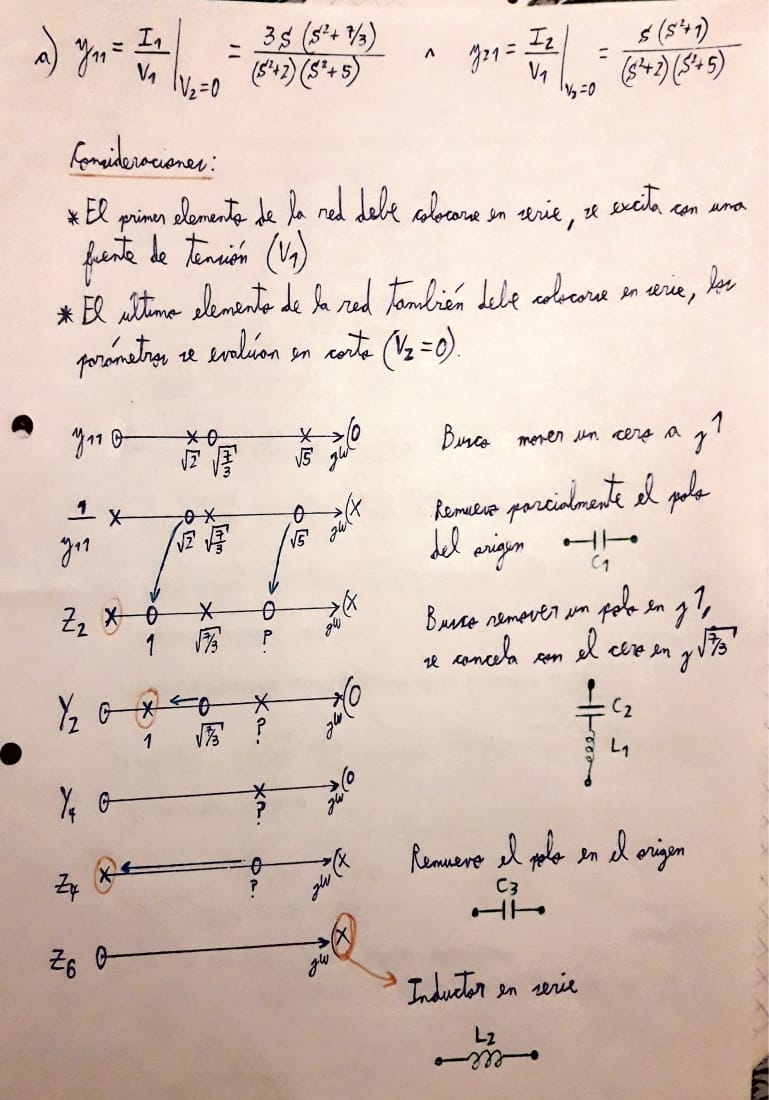

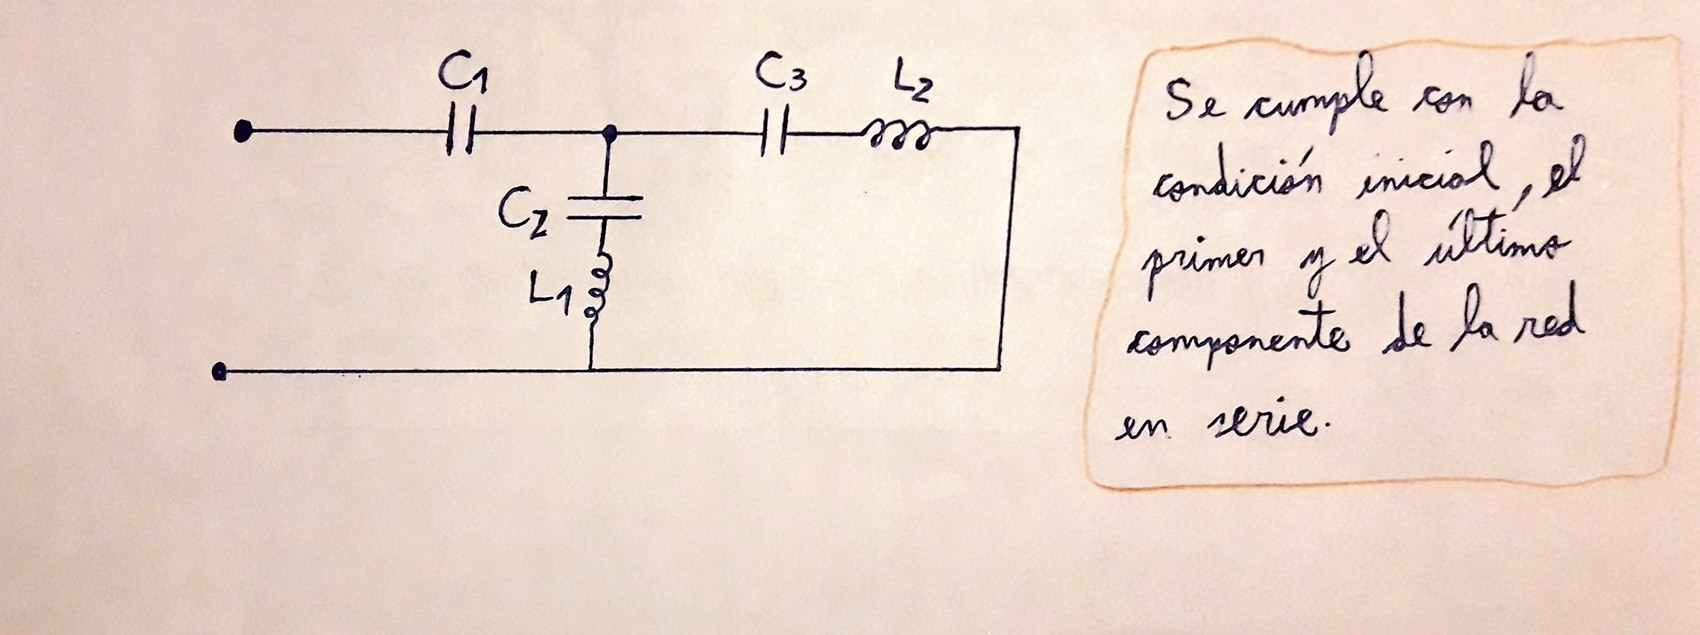

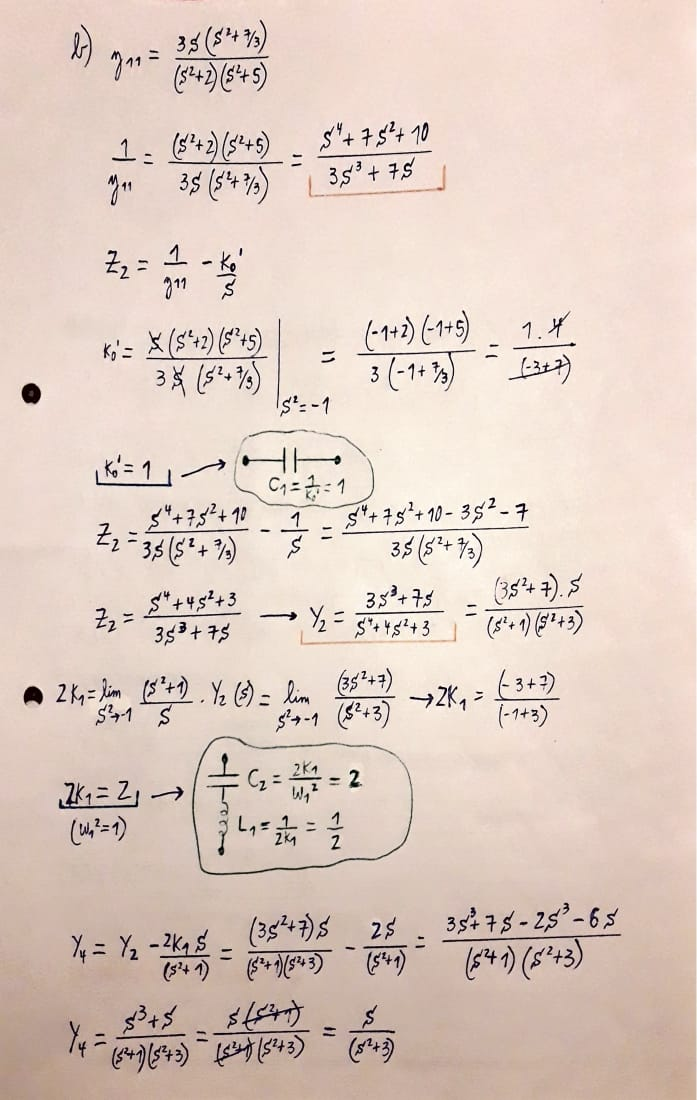

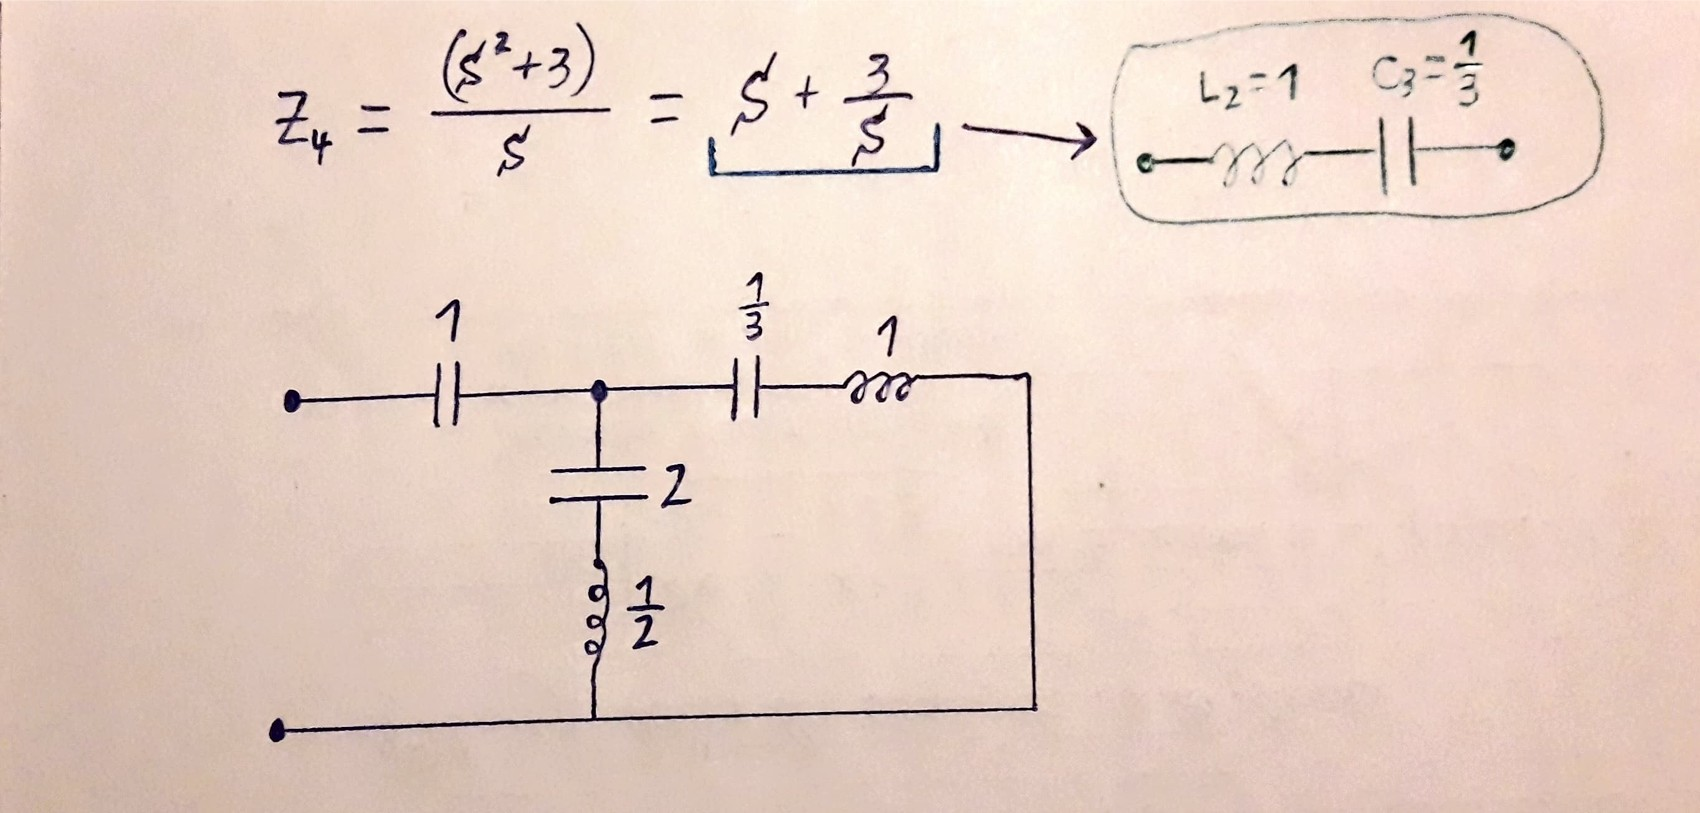

In [1]:
# Módulos importantantes
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s ', complex=True)

YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

#Remuevo parcialmente el polo en el origen para llevar un cero a j1

Z2, Zc1 = tc2.remover_polo_dc(1/YY, omega_zero = 1 )

#Obtengo el valor del componente

C1 = 1/(s*Zc1)

#Remuevo el polo en j1

Y4, Yt2, L1, C2 = tc2.remover_polo_jw(1/Z2, isImpedance = False, omega = 1)

#Remuevo el polo del origen

Z6, Zc3 = tc2.remover_polo_dc(1/Y4)

#Obtengo el valor del componente

C3 = 1/(s*Zc3)

#Obtengo el ultimo componente

L2 = Z6/s

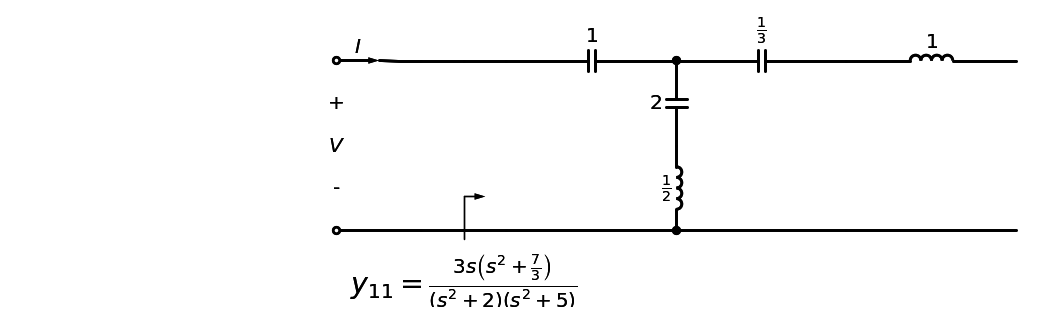

In [2]:

d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'y_{11}',  
                                          YY, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_serie(d, Capacitor, C1)
d = tc2.dibujar_tanque_derivacion(d, L1, C2)
d = tc2.dibujar_elemento_serie(d, Capacitor, C3)
d = tc2.dibujar_elemento_serie(d, Inductor, L2)

display(d)

Ahora que se verificó la simulación simbolica coincidiendo con el desarrollo hecho a mano, se procede a simular circuitalmente.

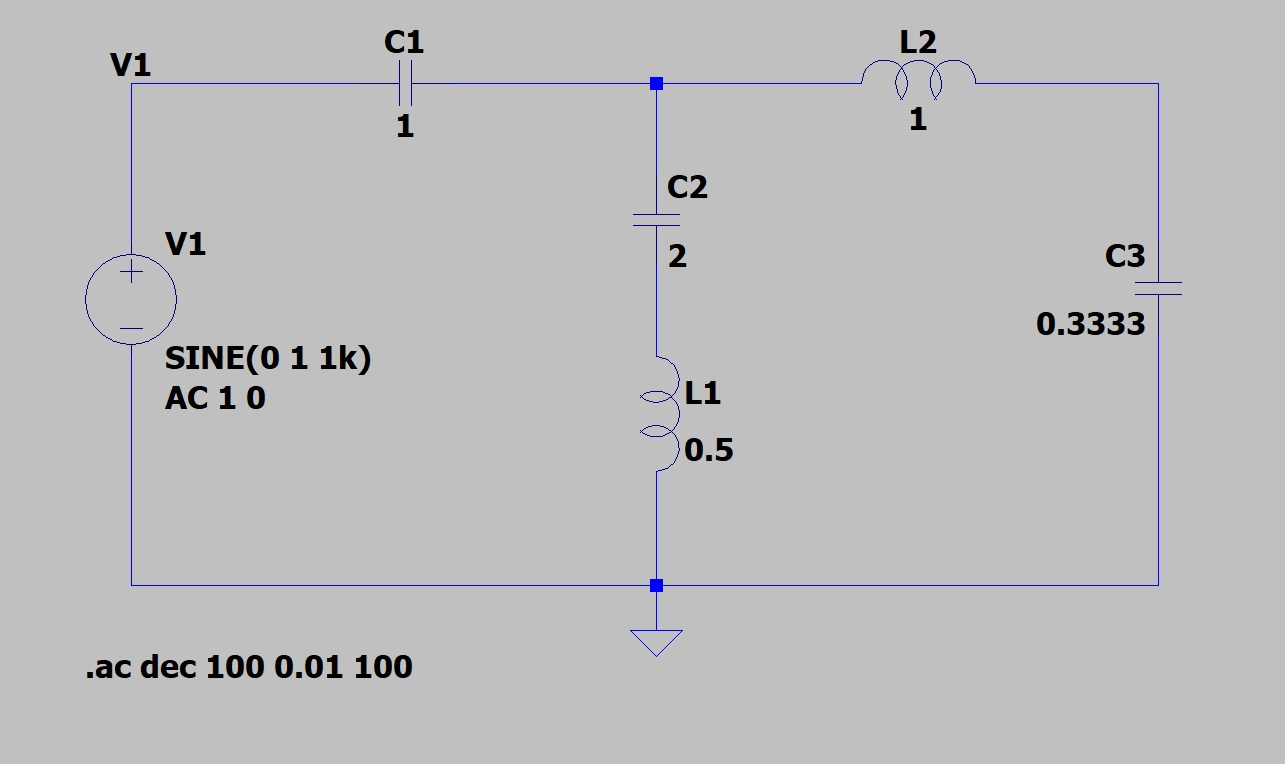

### Se verifica la respuesta en frecuencia de la admitancia de entrada $ y_{11} $

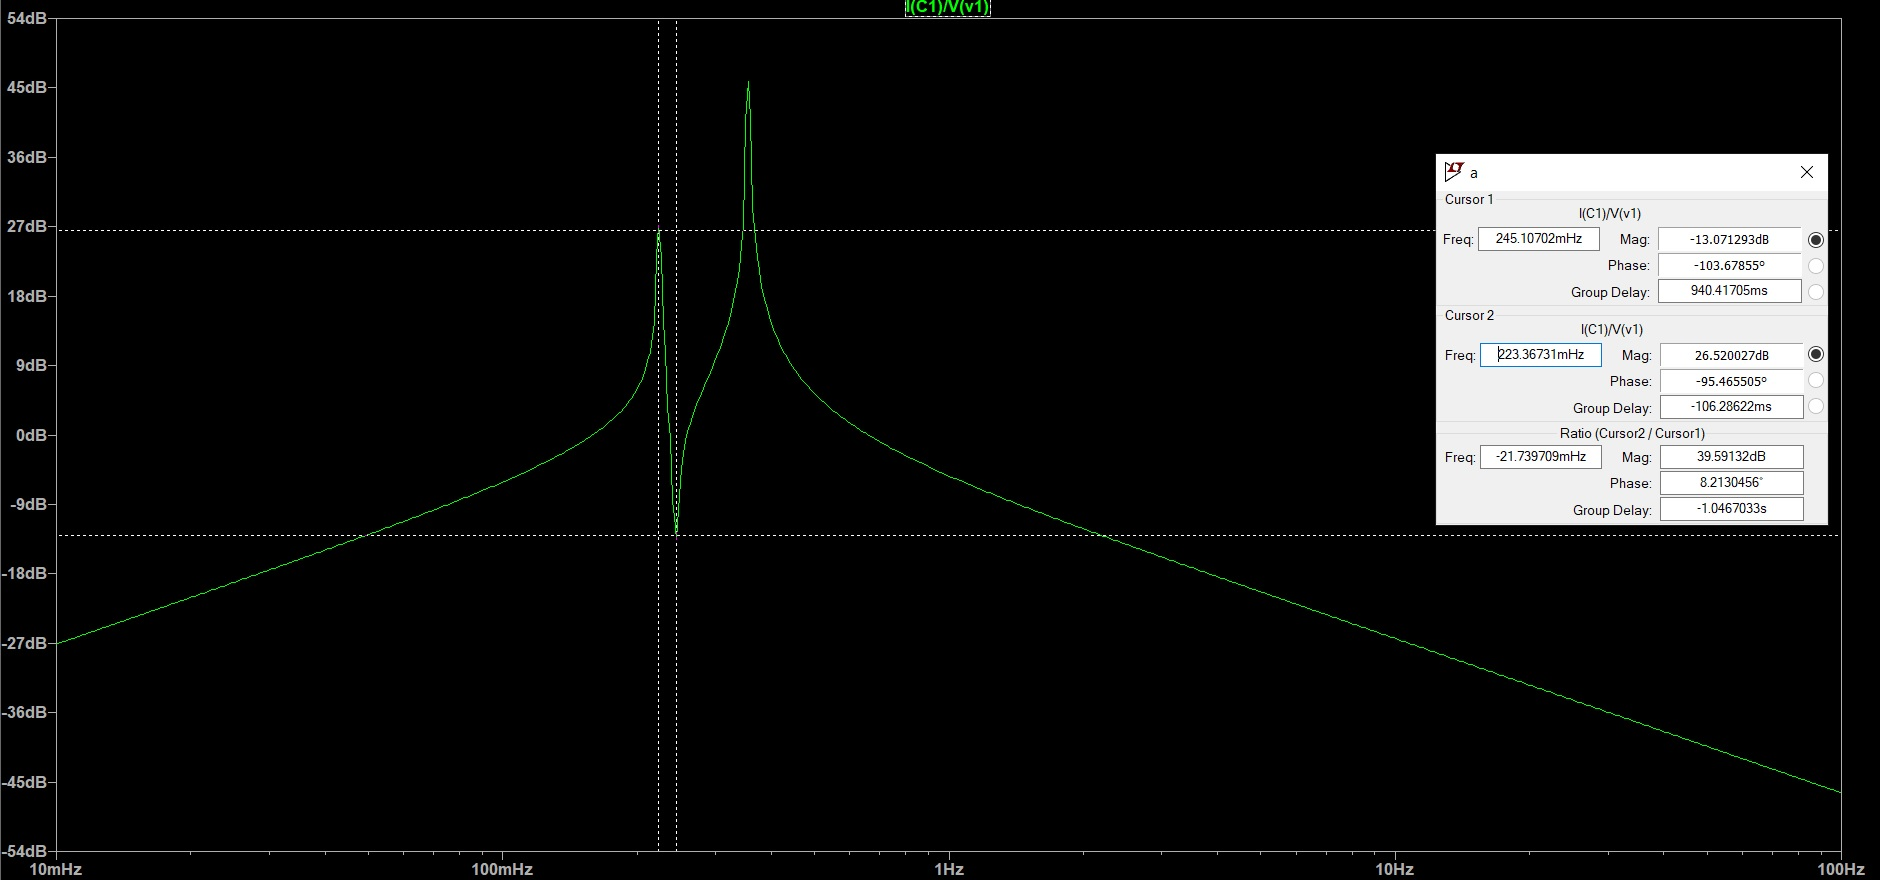

Se tiene un polo en $ \frac{\sqrt{2}}{2\pi} \cong 223mHz $
Se tiene un cero en $ \frac{\sqrt{\frac{7}{3}}}{2\pi} \cong 245mHz $

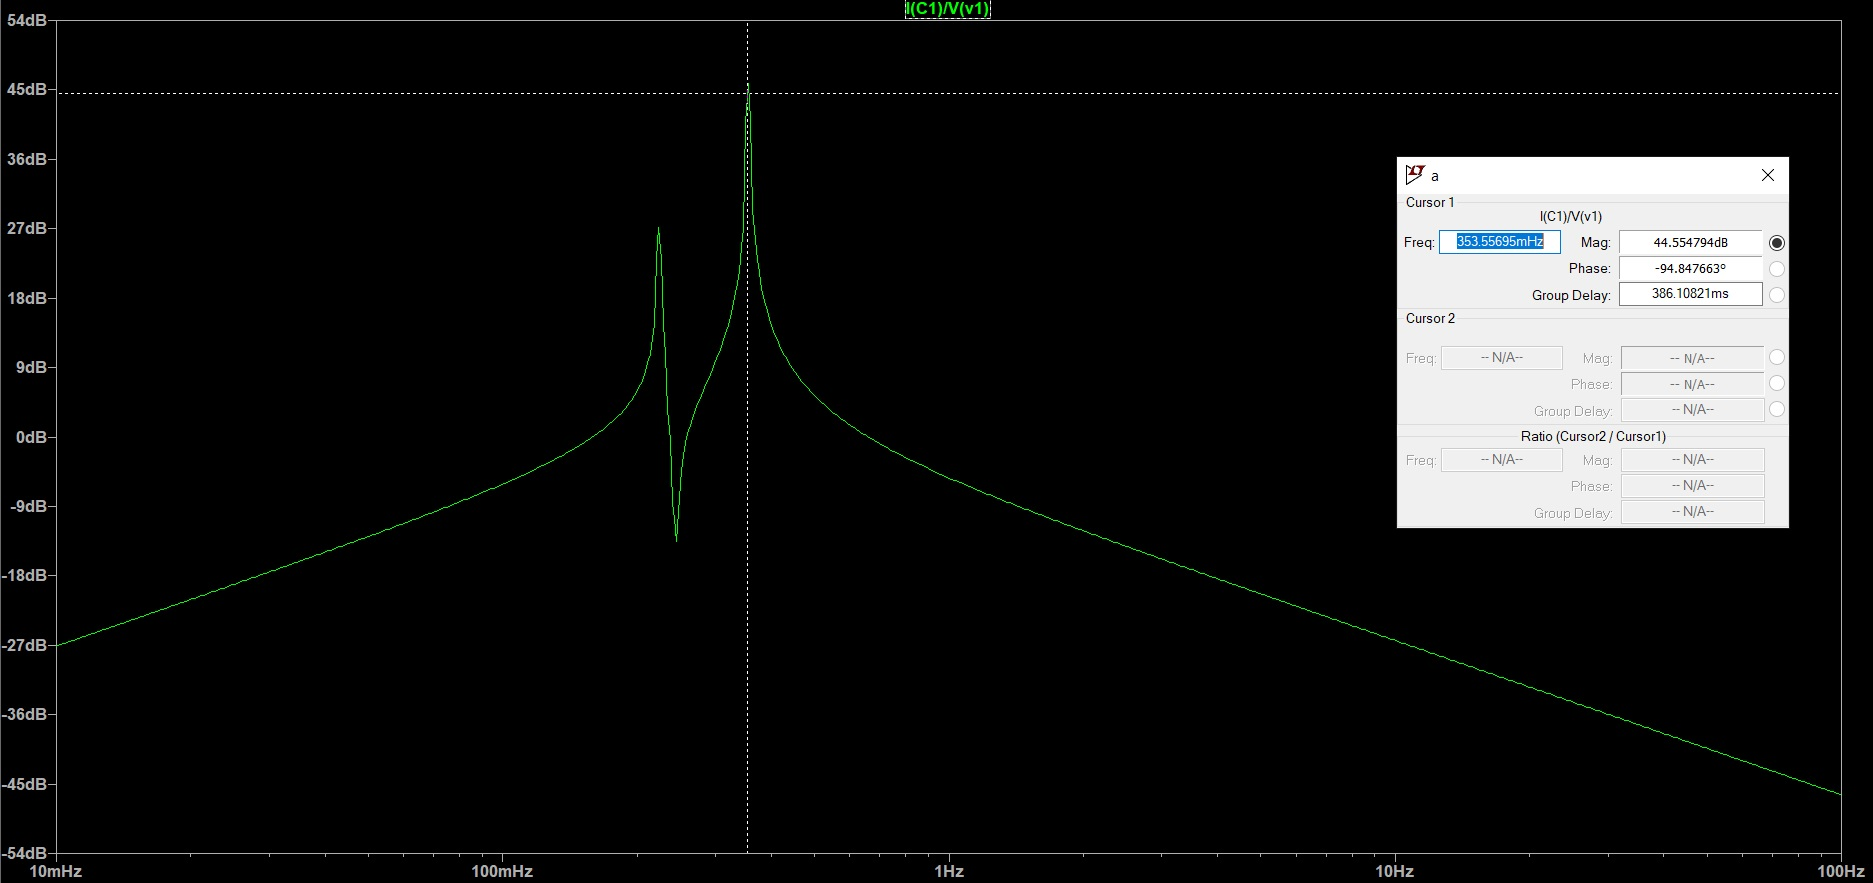

Se tiene un polo en $ \omega = \frac{\sqrt{5}}{2\pi} \cong 354mHz $

Además, se observa el comportamiento de un cero tanto en el origen como en el infinito.

### Ahora se verifica la $ y_{21} $ del circuito

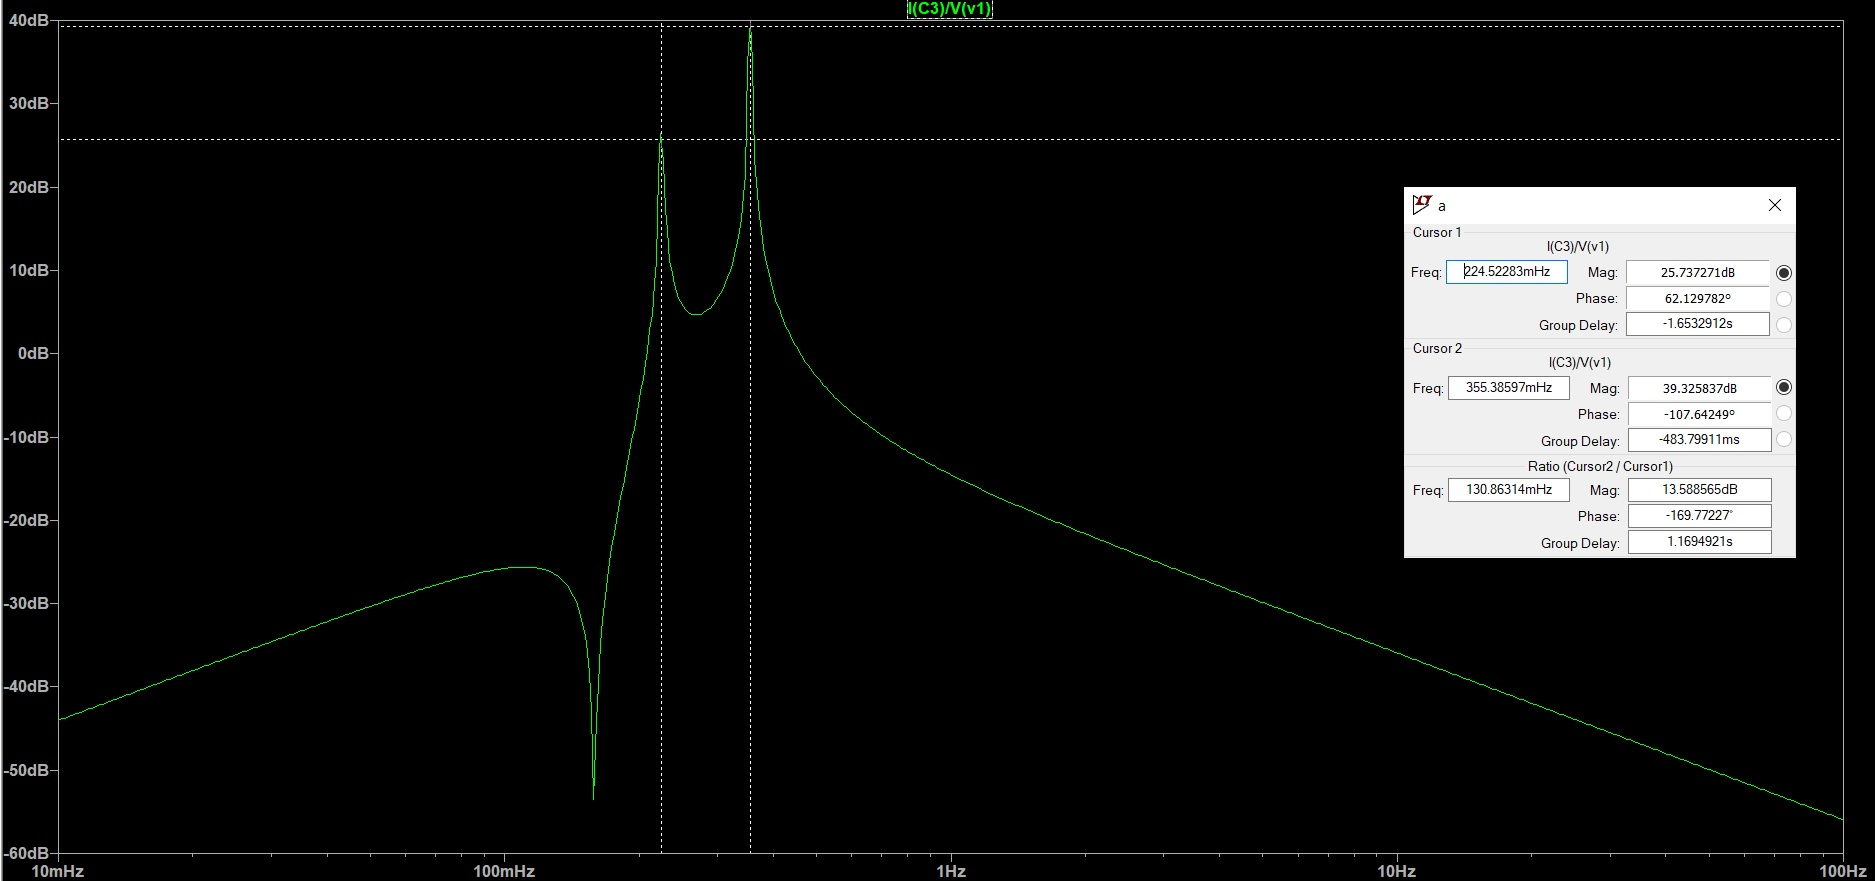

Se observa un polo en $ \frac{\sqrt{2}}{2\pi} \cong 224mHz $ y otro en $ \omega = \frac{\sqrt{5}}{2\pi} \cong 355mHz $

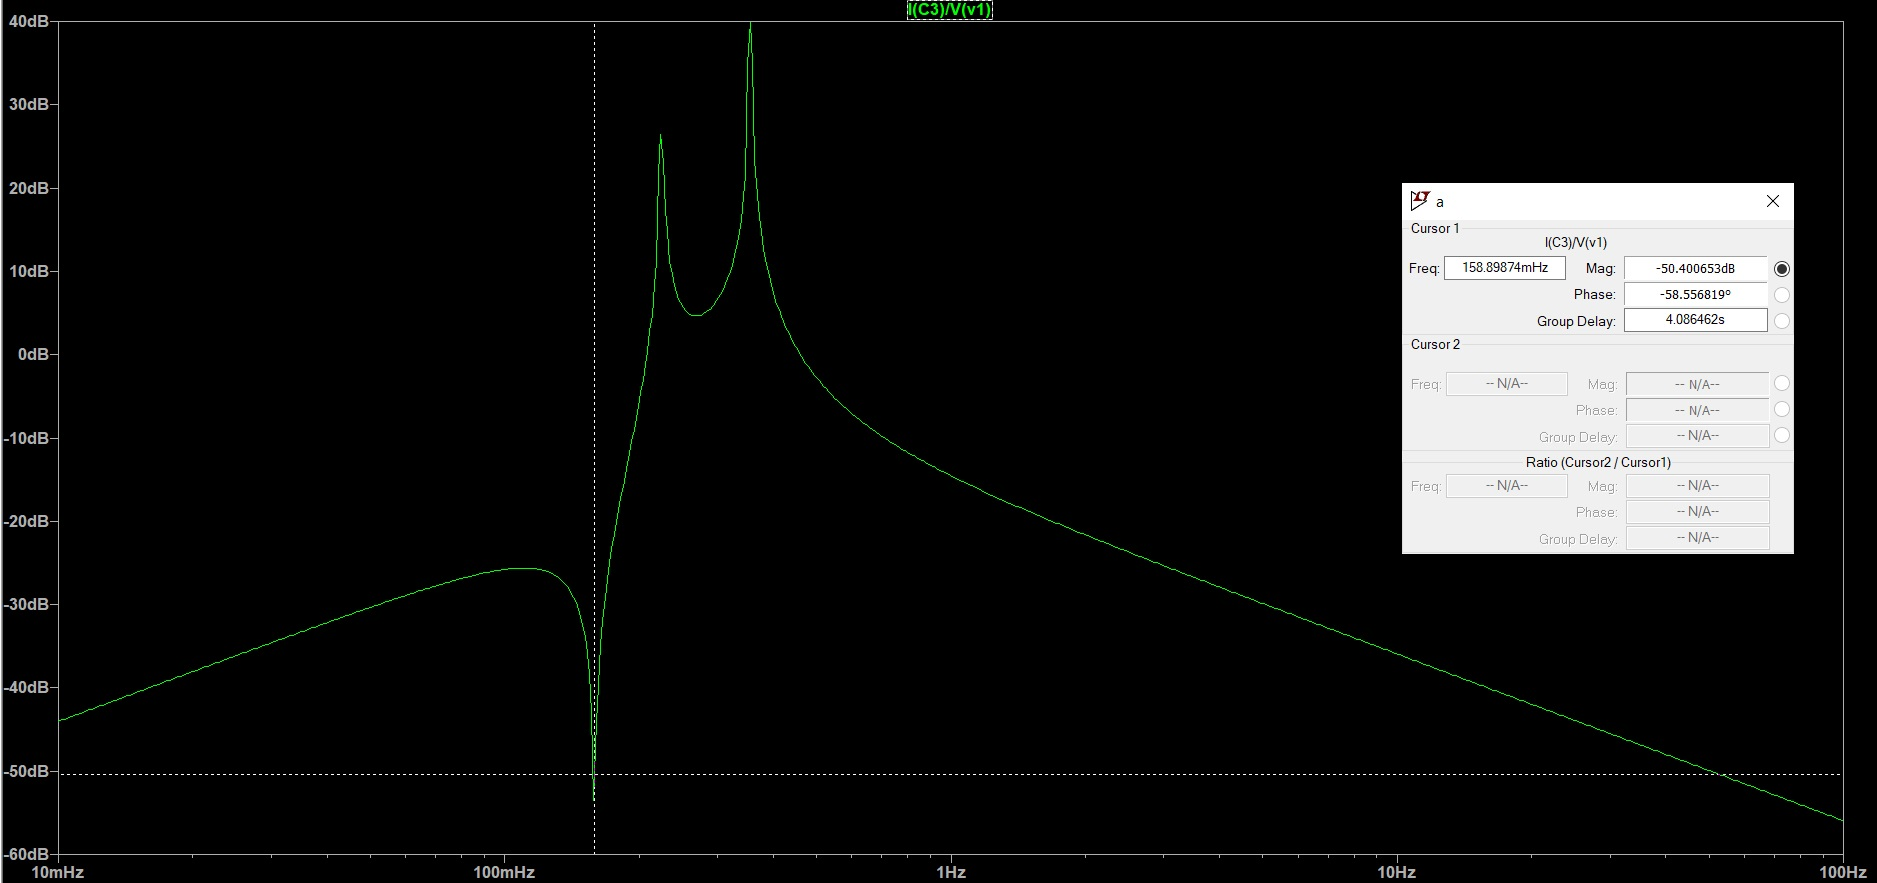

Además se ve un cero en $ \frac{1}{2\pi} \cong 159mHz $ otro en el origen y otro en el infinito. Por lo tanto, la simulación circuital también coincide con los cálculos realizados.

## 2) Dada la siguiente transferencia...



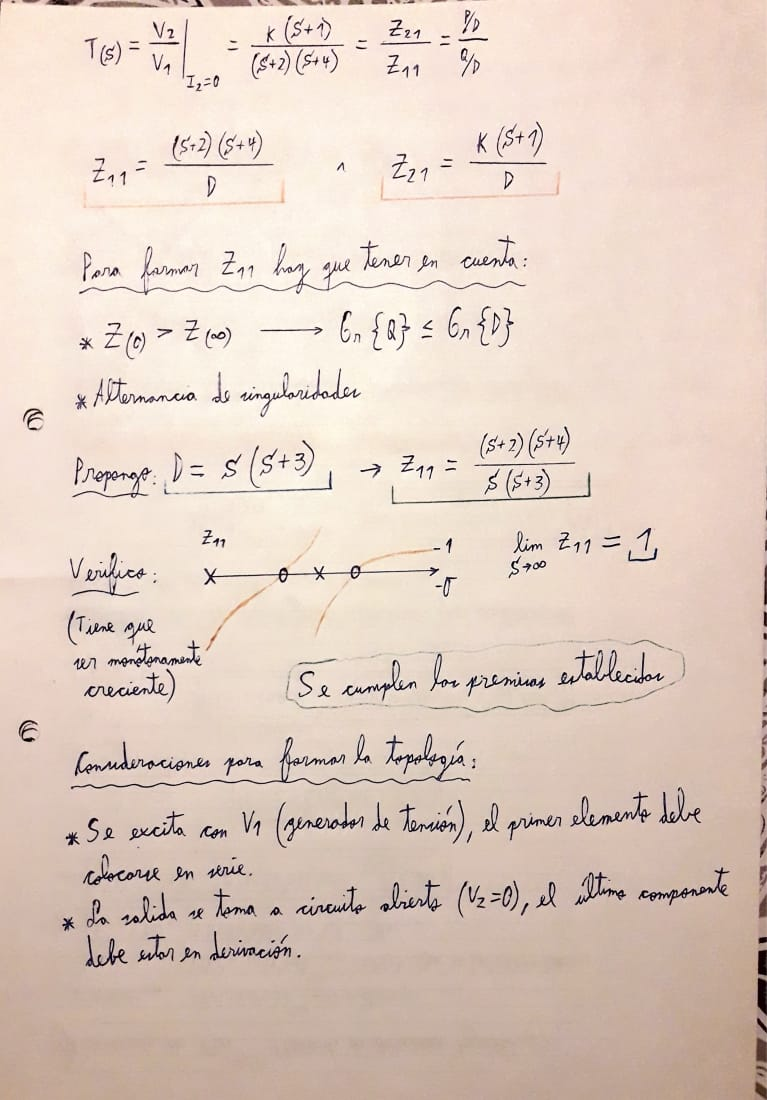

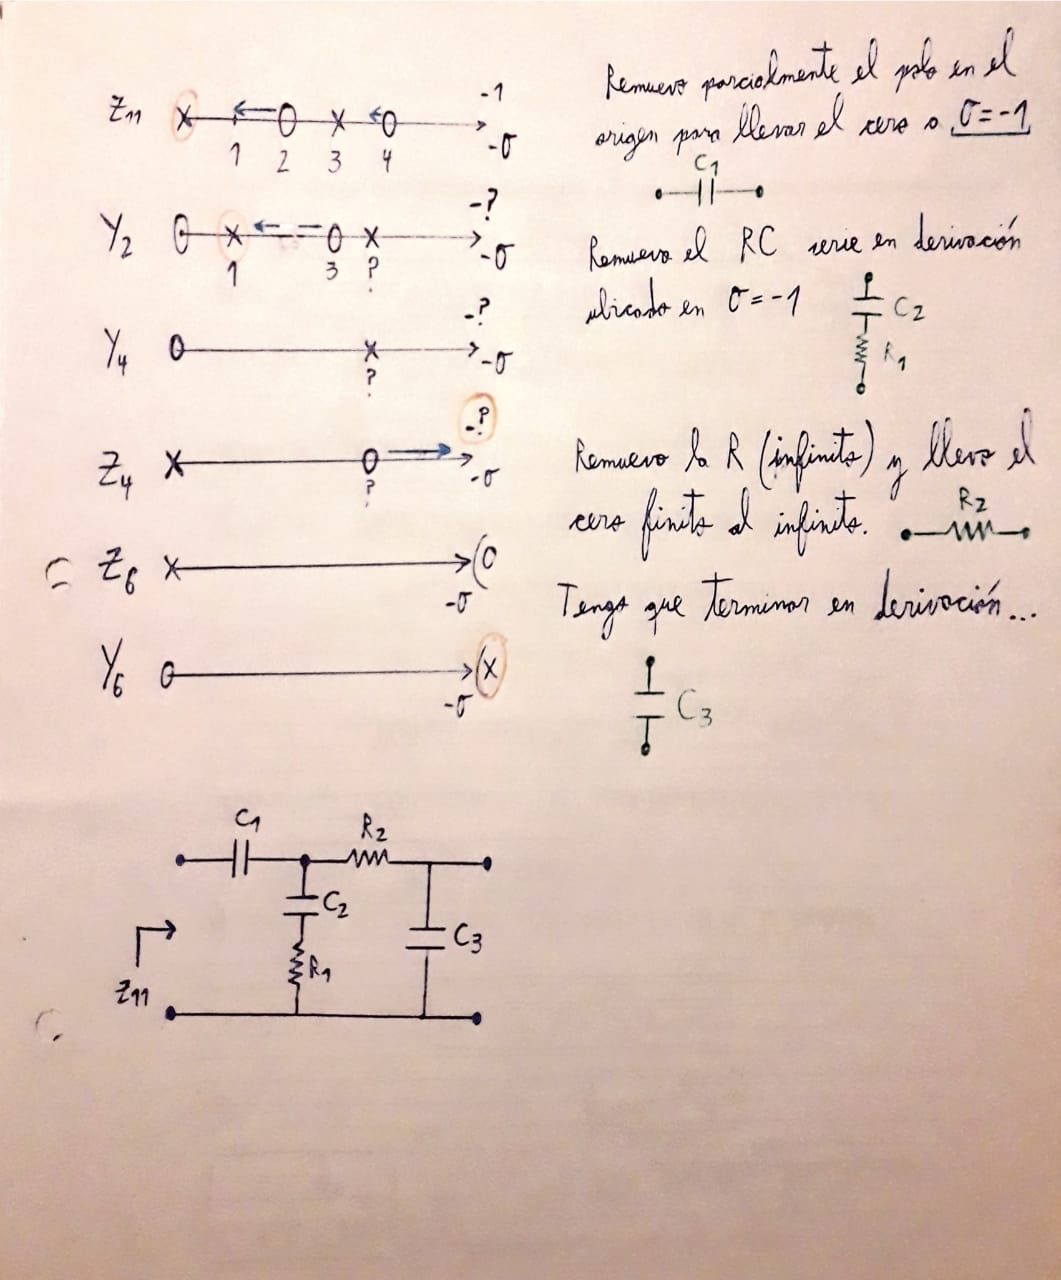

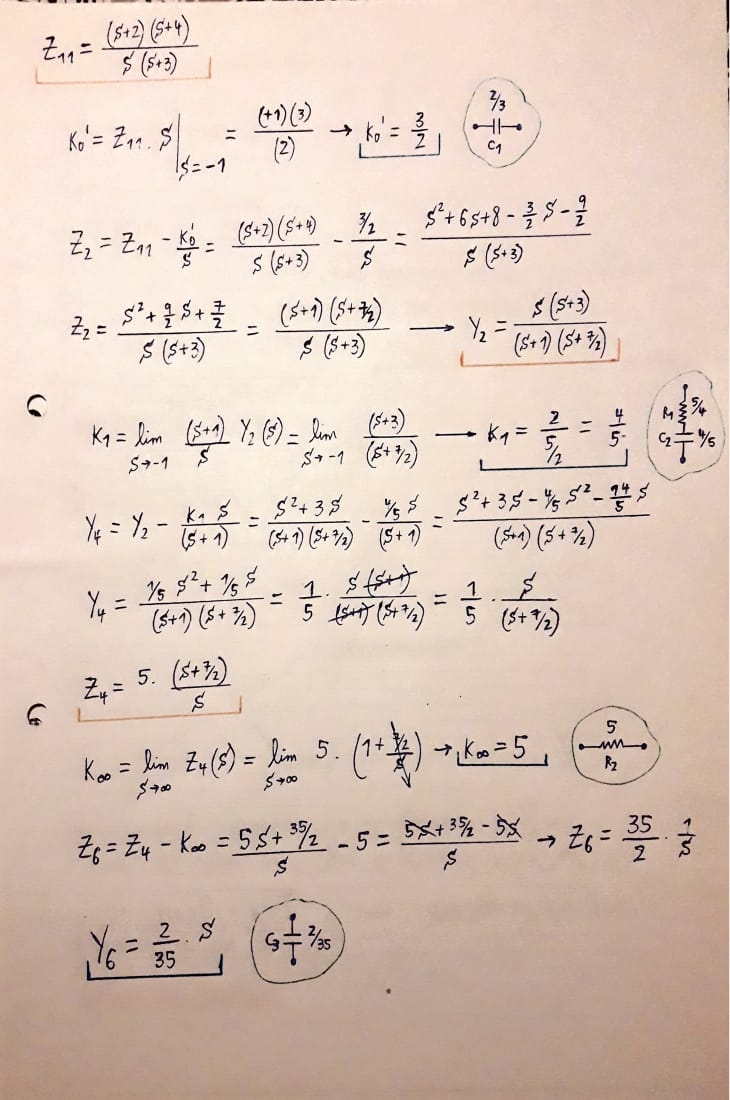

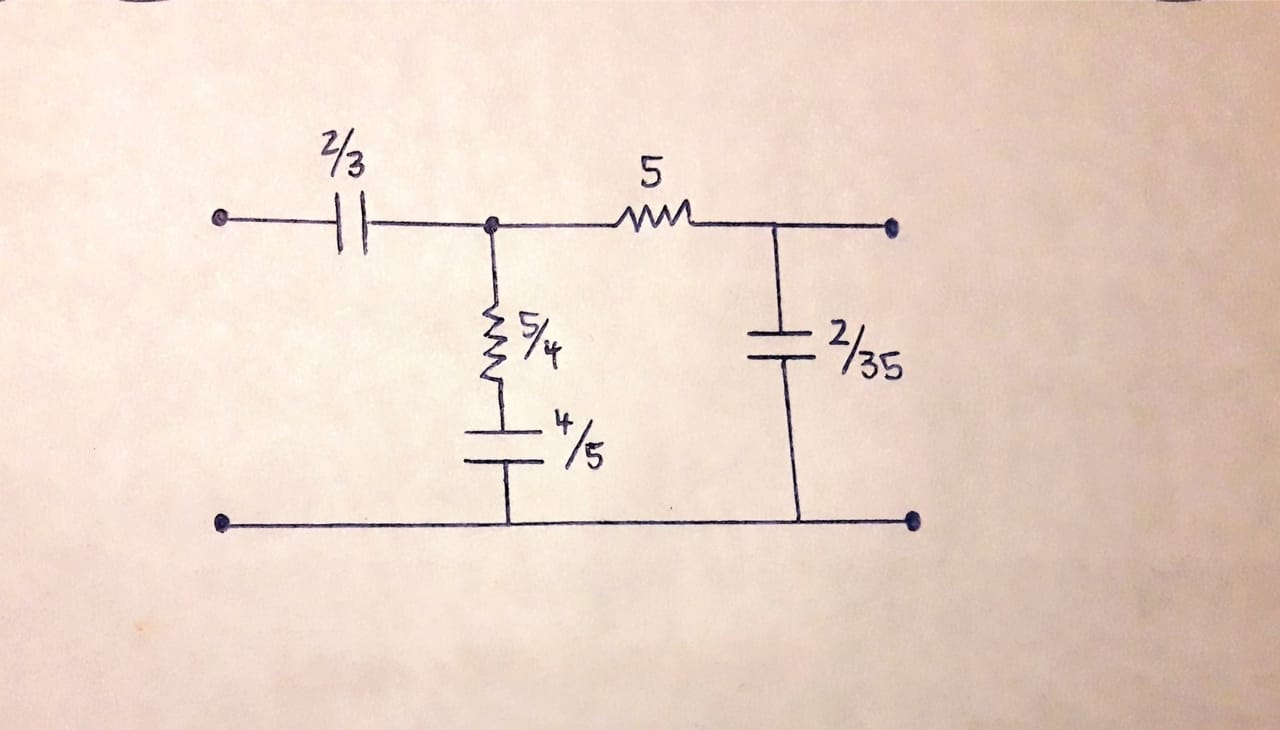